In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils.matplotlib_visualization_utils import plot_data1d_histogram, plot_densities
from ConfigParser import SafeConfigParser

In [2]:
mpl_plot_config_fname = 'mpl_plot.cfg'

In [3]:
parser = SafeConfigParser()
parser.read(mpl_plot_config_fname)

test_data_dir = parser.get('stacked', 'test_data_dir')
test_fin = parser.get('stacked', 'test_fin')

mpl_data_dir = parser.get('stacked', 'mpl_data_dir')

x_fin = parser.get('stacked', 'x_fin')
y_fin = parser.get('stacked', 'y_fin')

optimized_stacked_x_fout = parser.get('stacked', 'optimized_stacked_x_fout')
optimized_stacked_y_fout = parser.get('stacked', 'optimized_stacked_y_fout')
truth_stacked_x_fout = parser.get('stacked', 'truth_stacked_x_fout')
truth_stacked_y_fout = parser.get('stacked', 'truth_stacked_y_fout')
overlay_x_fout = parser.get('stacked', 'overlay_x_fout')
overlay_y_fout = parser.get('stacked', 'overlay_y_fout')

true_proportions = map(float, parser.get('stacked', 'true_proportions').split())
optimized_proportions = map(float, parser.get('stacked', 'true_proportions').split())

plot_truth_stack = bool(int(parser.get('stacked', 'plot_truth_stack')))
save_fig = bool(int(parser.get('stacked', 'save_fig')))


z1_min = float(parser.get('individual', 'z1_min'))
z1_max = float(parser.get('individual', 'z1_max'))
z2_min = float(parser.get('individual', 'z2_min'))
z2_max = float(parser.get('individual', 'z2_max'))

In [4]:
test_data = np.genfromtxt(test_data_dir + '/' + test_fin)

In [5]:
stack_x = np.genfromtxt(mpl_data_dir + '/' + x_fin)
stack_y = np.genfromtxt(mpl_data_dir + '/' + y_fin)

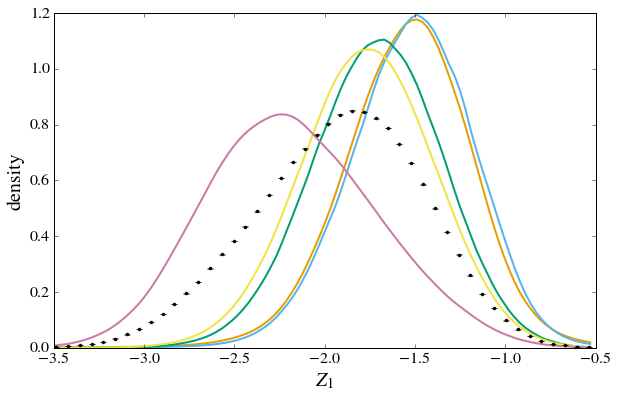

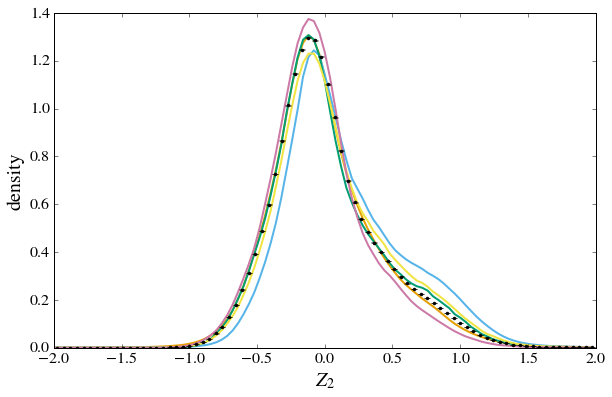

In [6]:
fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_x, stacked=False, ax=ax, xlabel=r'$Z_1$')
plot_data1d_histogram(test_data[:,0], weights=test_data[:,2], bins=100,normed=True, ax=ax, xlabel=r'$Z_1$');
ax.set_xlim(z1_min, z1_max)
ax.set_ylim(0)
if save_fig: fig.savefig(overlay_x_fout)

fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_y, stacked=False, ax=ax, xlabel=r'$Z_2$')
plot_data1d_histogram(test_data[:,1], weights=test_data[:,2], bins=300,normed=True, ax=ax, xlabel=r'$Z_2$');
ax.set_xlim(z2_min, z2_max)
ax.set_ylim(0)
if save_fig: fig.savefig(overlay_y_fout)

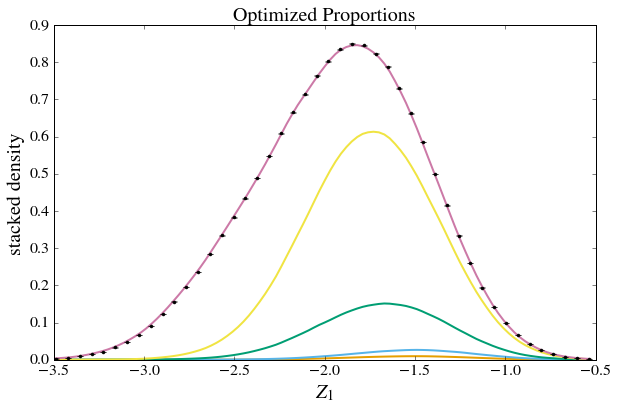

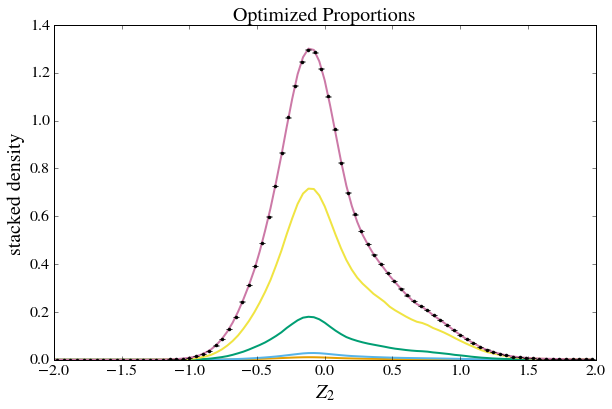

In [7]:
fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_x, stacked=True, prop=optimized_proportions, ax=ax, xlabel=r'$Z_1$', title='Optimized Proportions')
plot_data1d_histogram(test_data[:,0], weights=test_data[:,2], bins=100,normed=True, ax=ax, xlabel=r'$Z_1$', title='Optimized Proportions');
ax.set_xlim(z1_min, z1_max)
ax.set_ylim(0)
if save_fig: fig.savefig(optimized_stacked_x_fout)

fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_y, stacked=True, prop=optimized_proportions, ax=ax, xlabel=r'$Z_2$', title='Optimized Proportions')
plot_data1d_histogram(test_data[:,1], weights=test_data[:,2], bins=300,normed=True, ax=ax, xlabel=r'$Z_2$', title='Optimized Proportions');
ax.set_xlim(z2_min, z2_max)
ax.set_ylim(0)
if save_fig: fig.savefig(optimized_stacked_y_fout)

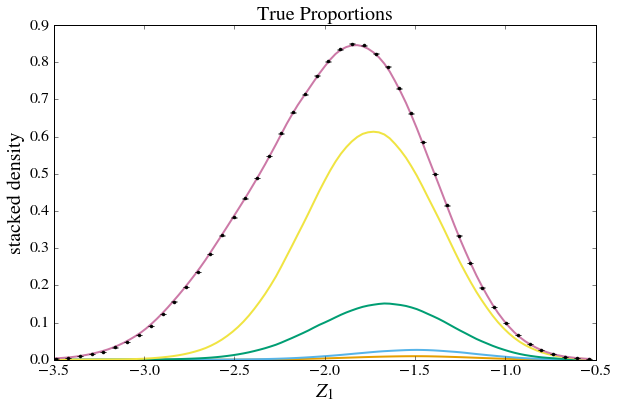

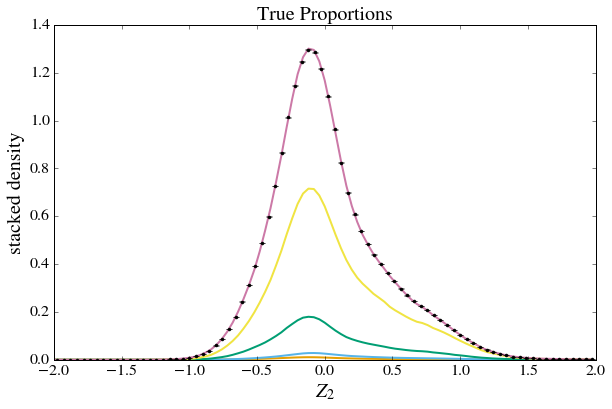

In [8]:
if plot_truth_stack:
    fig = plt.figure(figsize=(6*1.618,6))
    ax = fig.add_subplot(1,1,1)
    plot_densities(stack_x, stacked=True, prop=true_proportions, ax=ax, xlabel=r'$Z_1$', title='True Proportions')
    plot_data1d_histogram(test_data[:,0], weights=test_data[:,2], bins=100,normed=True, ax=ax, xlabel=r'$Z_1$', title='True Proportions');
    ax.set_xlim(z1_min, z1_max)
    ax.set_ylim(0)
    if save_fig: fig.savefig(truth_stacked_x_fout)

    fig = plt.figure(figsize=(6*1.618,6))
    ax = fig.add_subplot(1,1,1)
    plot_densities(stack_y, stacked=True, prop=true_proportions, ax=ax, xlabel=r'$Z_2$', title='True Proportions')
    plot_data1d_histogram(test_data[:,1], weights=test_data[:,2], bins=300,normed=True, ax=ax, xlabel=r'$Z_2$', title='True Proportions');
    ax.set_xlim(z2_min, z2_max)
    ax.set_ylim(0)
    if save_fig: fig.savefig(truth_stacked_y_fout)